In [1]:
%matplotlib inline

import book_format
book_format.set_style()

sum =  1.0


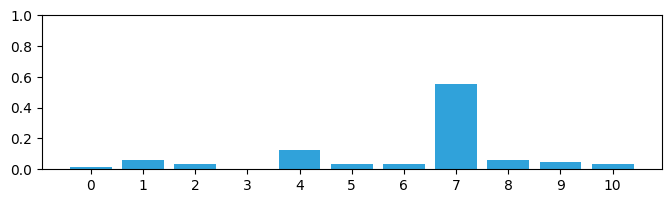

In [2]:
import numpy as np
import kf_book.book_plots as book_plots

belief = np.array([1, 4, 2, 0, 8, 2, 2, 35, 4, 3, 2])
belief = belief / np.sum(belief)
with book_plots.figsize(y=2):
    book_plots.bar_plot(belief)
print('sum = ', np.sum(belief))

In [3]:
x = [1.8, 2.0, 1.7, 1.9, 1.6]
np.mean(x)


x = np.array([1.8, 2.0, 1.7, 1.9, 1.6])
x.mean()

np.median(x)

1.8

In [4]:
total = 0
N = 1000000
for r in np.random.rand(N):
    if r <= .80: total += 1
    elif r < .95: total += 3
    else: total += 5

total / N

1.50017

In [5]:
X = [1.8, 2.0, 1.7, 1.9, 1.6]
Y = [2.2, 1.5, 2.3, 1.7, 1.3]
Z = [1.8, 1.8, 1.8, 1.8, 1.8]

print(np.mean(X), np.mean(Y), np.mean(Z))

1.8 1.8 1.8


In [7]:
print(f"{np.var(X):.2f} meters squared")

print(f"std {np.std(X):.4f}")
print(f"var {np.std(X)**2:.4f}")

0.02 meters squared
std 0.1414
var 0.0200


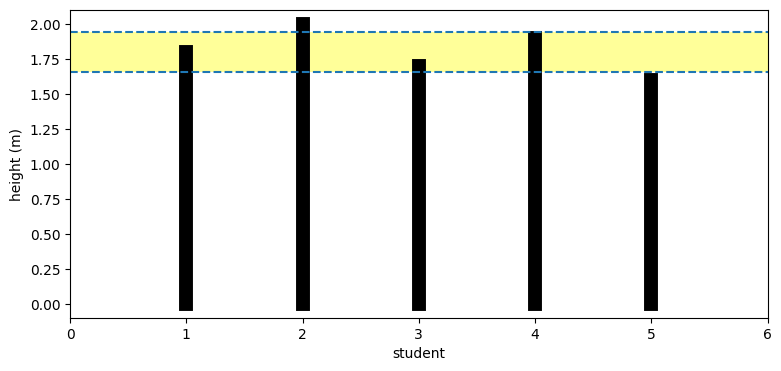

In [9]:
from kf_book.gaussian_internal import plot_height_std
import matplotlib.pyplot as plt

plot_height_std(X)

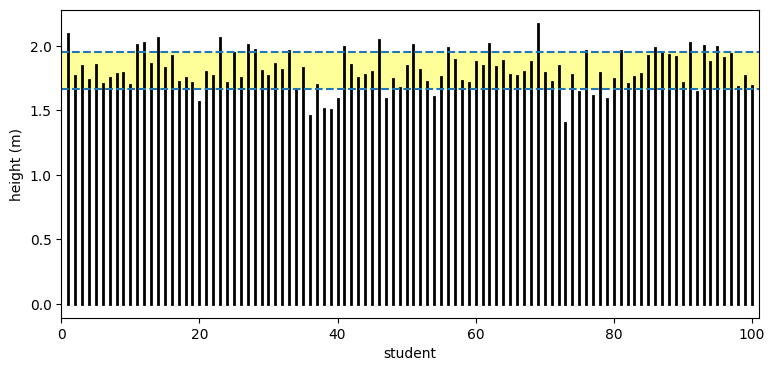

mean = 1.810
std  = 0.145


In [10]:
from numpy.random import randn
data = 1.8 + randn(100)*.1414
mean, std = data.mean(), data.std()

plot_height_std(data, lw=2)
print(f'mean = {mean:.3f}')
print(f'std  = {std:.3f}')


In [11]:
np.sum((data > mean-std) & (data < mean+std)) / len(data) * 100.
print(f'std of Y is {np.std(Y):.2f} m')

std of Y is 0.39 m


In [12]:
X = [1, -1, 1, -2, -1, 2, 1, 2, -1, 1, -1, 2, 1, -2, 100]
print(f'Variance of X with outlier    = {np.var(X):6.2f}')
print(f'Variance of X without outlier = {np.var(X[:-1]):6.2f}')


Variance of X with outlier    = 621.45
Variance of X without outlier =   2.03


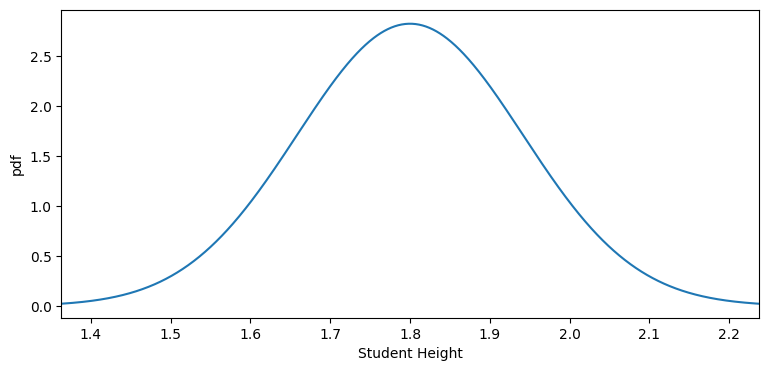

In [13]:
from filterpy.stats import plot_gaussian_pdf
plot_gaussian_pdf(mean=1.8, variance=0.1414**2, 
                  xlabel='Student Height', ylabel='pdf');

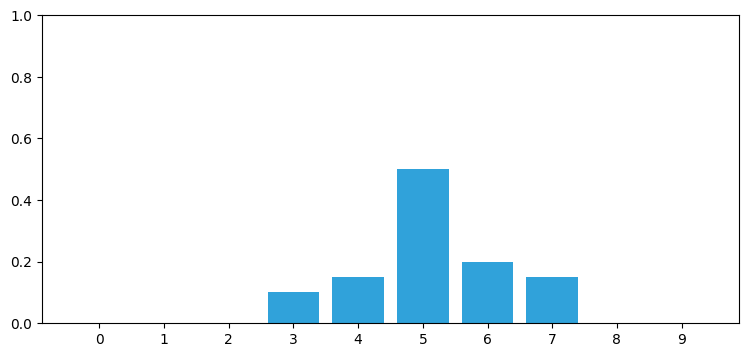

In [14]:
import kf_book.book_plots as book_plots
belief = [0., 0., 0., 0.1, 0.15, 0.5, 0.2, .15, 0, 0]
book_plots.bar_plot(belief)

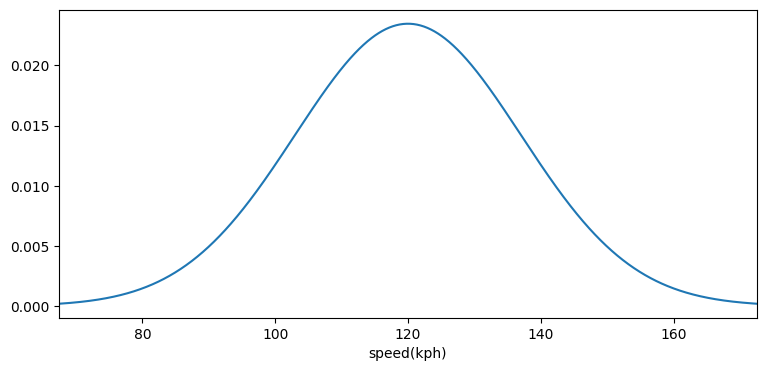

In [15]:
plot_gaussian_pdf(mean=120, variance=17**2, xlabel='speed(kph)');

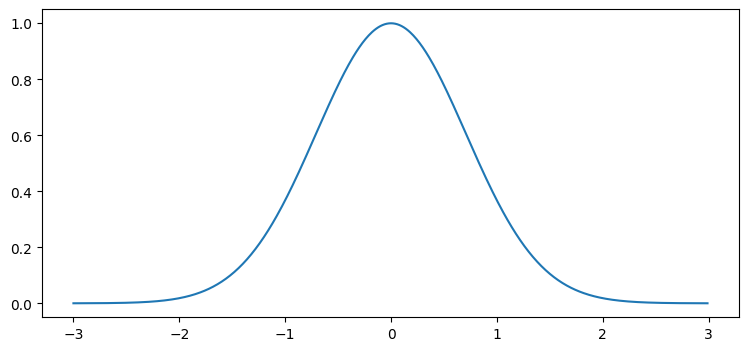

In [16]:
x = np.arange(-3, 3, .01)
plt.plot(x, np.exp(-x**2));

In [17]:
from filterpy.stats import norm_cdf
print('Cumulative probability of range 21.5 to 22.5 is {:.2f}%'.format(
      norm_cdf((21.5, 22.5), 22,4)*100))
print('Cumulative probability of range 23.5 to 24.5 is {:.2f}%'.format(
      norm_cdf((23.5, 24.5), 22,4)*100))

Cumulative probability of range 21.5 to 22.5 is 19.74%
Cumulative probability of range 23.5 to 24.5 is 12.10%


In [18]:
from filterpy.stats import gaussian

print(gaussian(x=3.0, mean=2.0, var=1))
print(gaussian(x=[3.0, 2.0], mean=2.0, var=1))

0.24197072451914337
[0.378 0.622]


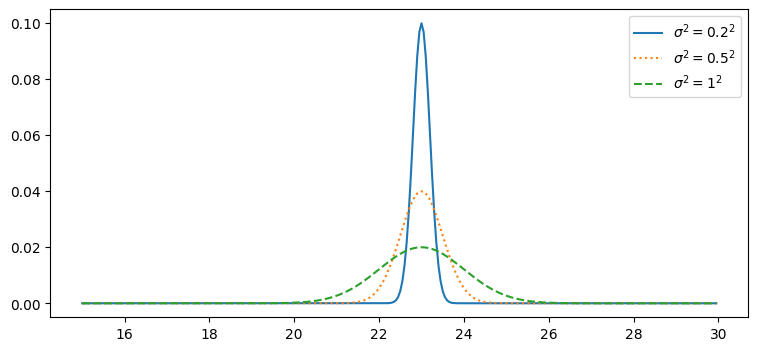

In [19]:
xs = np.arange(15, 30, 0.05)
plt.plot(xs, gaussian(xs, 23, 0.2**2), label='$\sigma^2=0.2^2$')
plt.plot(xs, gaussian(xs, 23, .5**2), label='$\sigma^2=0.5^2$', ls=':')
plt.plot(xs, gaussian(xs, 23, 1**2), label='$\sigma^2=1^2$', ls='--')
plt.legend();

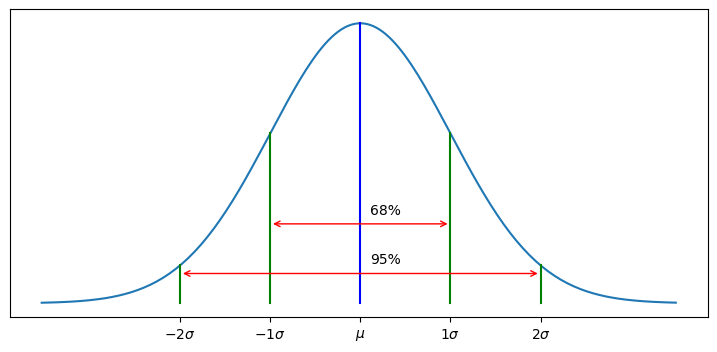

In [20]:
from kf_book.gaussian_internal import display_stddev_plot
display_stddev_plot()

In [21]:
import math
from ipywidgets import interact, FloatSlider

def plt_g(mu,variance):
    plt.figure()
    xs = np.arange(2, 8, 0.01)
    ys = gaussian(xs, mu, variance)
    plt.plot(xs, ys)
    plt.ylim(0, 0.04)
    plt.show()

interact(plt_g, mu=FloatSlider(value=5, min=3, max=7),
         variance=FloatSlider(value = .03, min=.01, max=1.));

interactive(children=(FloatSlider(value=5.0, description='mu', max=7.0, min=3.0), FloatSlider(value=0.03, desc…

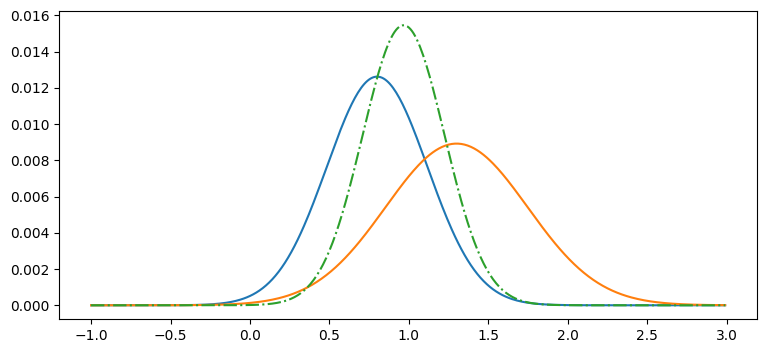

In [22]:
x = np.arange(-1, 3, 0.01)
g1 = gaussian(x, mean=0.8, var=.1)
g2 = gaussian(x, mean=1.3, var=.2)
plt.plot(x, g1, x, g2)

g = g1 * g2  # element-wise multiplication
g = g / sum(g)  # normalize
plt.plot(x, g, ls='-.');

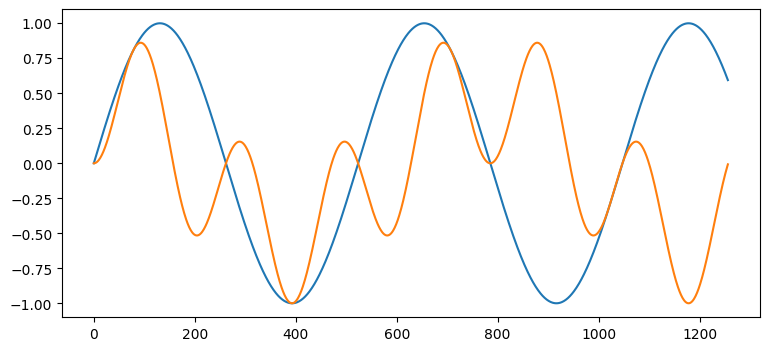

In [23]:
x = np.arange(0, 4*np.pi, 0.01)
plt.plot(np.sin(1.2*x))
plt.plot(np.sin(1.2*x) * np.sin(2*x));

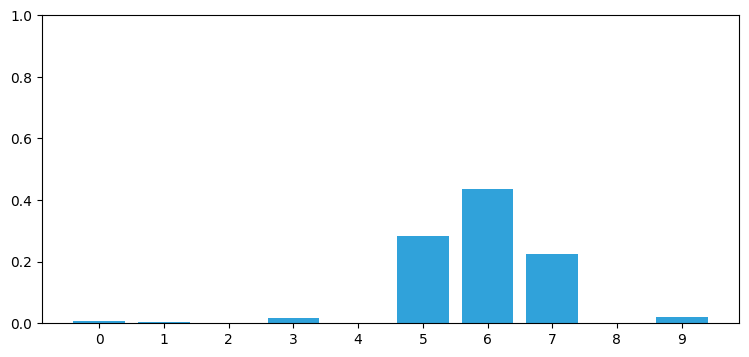

In [24]:
def normalize(p):
    return p / sum(p)

def update(likelihood, prior):
    return normalize(likelihood * prior)

prior =      normalize(np.array([4, 2, 0, 7, 2, 12, 35, 20, 3, 2]))
likelihood = normalize(np.array([3, 4, 1, 4, 2, 38, 20, 18, 1, 16]))
posterior = update(likelihood, prior)
book_plots.bar_plot(posterior)

mean: 5.88 var: 1.24


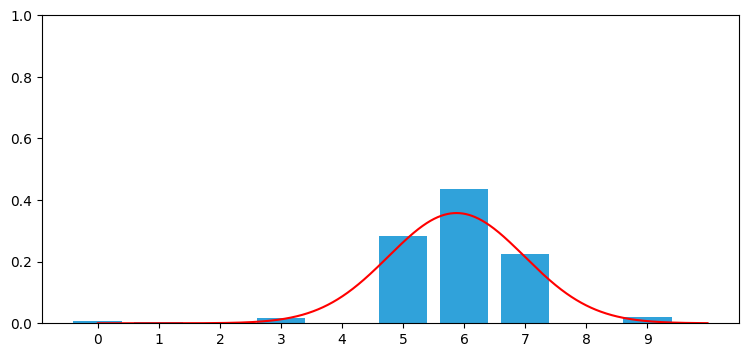

In [25]:
xs = np.arange(0, 10, .01)

def mean_var(p):
    x = np.arange(len(p))
    mean = np.sum(p * x,dtype=float)
    var = np.sum((x - mean)**2 * p)
    return mean, var

mean, var = mean_var(posterior)
book_plots.bar_plot(posterior)
plt.plot(xs, gaussian(xs, mean, var, normed=False), c='r');
print('mean: %.2f' % mean, 'var: %.2f' % var)

In [26]:
from scipy.stats import norm
import filterpy.stats
print(norm(2, 3).pdf(1.5))
print(filterpy.stats.gaussian(x=1.5, mean=2, var=3*3))

0.13114657203397997
0.13114657203397995


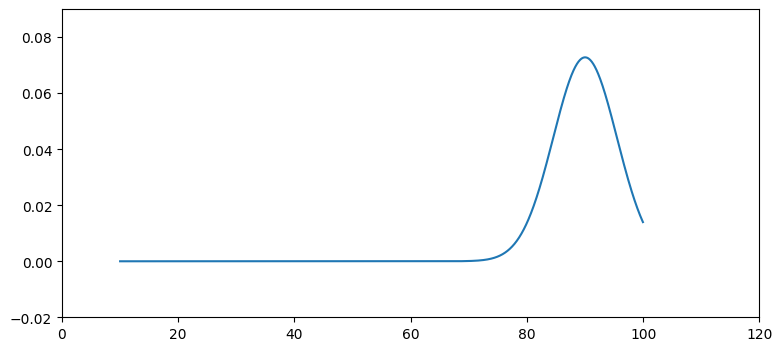

In [27]:
xs = np.arange(10, 100, 0.05)
ys = [gaussian(x, 90, 30) for x in xs]
plt.plot(xs, ys, label='var=0.2')
plt.xlim(0, 120)
plt.ylim(-0.02, 0.09);